# Data preparation

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('insurance').getOrCreate()
df = spark.read.csv('/FileStore/tables/train.csv',inferSchema=True,header=True)
df.printSchema()

root
-- id: integer (nullable = true)
-- Gender: string (nullable = true)
-- Age: integer (nullable = true)
-- Driving_License: integer (nullable = true)
-- Region_Code: double (nullable = true)
-- Previously_Insured: integer (nullable = true)
-- Vehicle_Age: string (nullable = true)
-- Vehicle_Damage: string (nullable = true)
-- Annual_Premium: double (nullable = true)
-- Policy_Sales_Channel: double (nullable = true)
-- Vintage: integer (nullable = true)
-- Response: integer (nullable = true)

###Correct schema of some variables

In [0]:
from pyspark.sql.types import StructField,StringType,IntegerType,DoubleType,StructType
df_schema = StructType([
    StructField('id', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Age', IntegerType(), True),
    StructField('Driving_License', StringType(), True),
    StructField('Region_Code', StringType(), True),
    StructField('Previously_Insured', StringType(), True),
    StructField('Vehicle_Age', StringType(), True),
    StructField('Vehicle_Damage', StringType(), True),
    StructField('Annual_Premium', DoubleType(), True),
    StructField('Policy_Sales_Channel', StringType(), True),
    StructField('Vintage', IntegerType(), True),
    StructField('Response', IntegerType(), True)
    ])
df = spark.createDataFrame(df.collect(),schema = df_schema)
df.printSchema()

root
-- id: string (nullable = true)
-- Gender: string (nullable = true)
-- Age: integer (nullable = true)
-- Driving_License: string (nullable = true)
-- Region_Code: string (nullable = true)
-- Previously_Insured: string (nullable = true)
-- Vehicle_Age: string (nullable = true)
-- Vehicle_Damage: string (nullable = true)
-- Annual_Premium: double (nullable = true)
-- Policy_Sales_Channel: string (nullable = true)
-- Vintage: integer (nullable = true)
-- Response: integer (nullable = true)

In [0]:
df.count()

Out[130]: 381109

In [0]:
df.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

# now let's check nulls for each column 
### For nulls(missing values), we can impute them by statistical values or drop it if it had too much

In [0]:
from pyspark.sql.functions import*
from pyspark.sql.functions import when,count,col
null_report=df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
print("Number of Rows: ",df.count(), "   Number of Columns: ",len(df.columns))
null_report.show()

Number of Rows: 381109 Number of Columns: 12
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+

### Surprisingly, the data has no nulls, so we can do some descriptive analysis

In [0]:
df.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

In [0]:
# Here numercal columns are picked for descriptive analysis 
df.select('Annual_Premium','Vintage','Age').describe().show()

+-------+------------------+------------------+------------------+
summary| Annual_Premium| Vintage| Age|
+-------+------------------+------------------+------------------+
 count| 381109| 381109| 381109|
 mean|30564.389581458323|154.34739667654136|38.822583565331705|
 stddev|17213.155056980144| 83.67130362658735|15.511611018095339|
 min| 2630.0| 10| 20|
 max| 540165.0| 299| 85|
+-------+------------------+------------------+------------------+

### From the descriptive statistic, there is no issue. Now, let us remove outliers.

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd
import random as rnd 

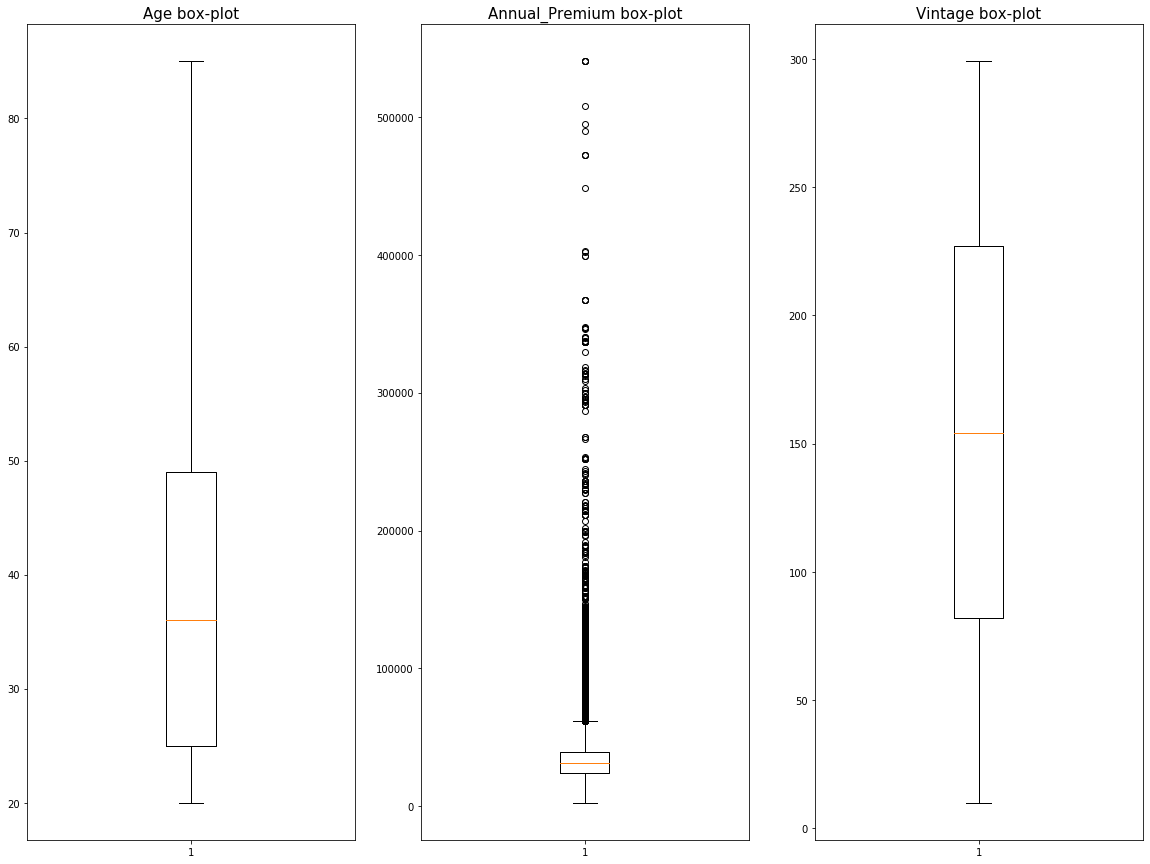

In [0]:
df1=df.toPandas()
f,(ax1, ax2, ax3) = plt.subplots(1,3, sharey=False,figsize=(20,15)) 
ax1.boxplot(df1['Age'])
ax1.set_title("Age box-plot", fontsize=15)
ax2.boxplot(df1['Annual_Premium'])
ax2.set_title("Annual_Premium box-plot", fontsize=15)
ax3.boxplot(df1['Vintage'])
ax3.set_title("Vintage box-plot", fontsize=15)

### According to the box-plots, there are some outliers in 'Annual_Premium'

### Next, we use the interquantile rule to delete outliers.

In [0]:
quantiles = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in ["Age", "Annual_Premium","Vintage"]
}
quantiles

Out[137]: {'Age': {'q1': 25.0, 'q3': 49.0},
 'Annual_Premium': {'q1': 24405.0, 'q3': 39400.0},
 'Vintage': {'q1': 82.0, 'q3': 227.0}}

In [0]:
for i in quantiles:
    iqr = quantiles[i]['q3'] - quantiles[i]['q1']
    quantiles[i]['lower_bound'] = quantiles[i]['q1'] - (iqr * 1.5)
    quantiles[i]['upper_bound'] = quantiles[i]['q3'] + (iqr * 1.5)
print(quantiles)

{'Age': {'q1': 25.0, 'q3': 49.0, 'lower_bound': -11.0, 'upper_bound': 85.0}, 'Annual_Premium': {'q1': 24405.0, 'q3': 39400.0, 'lower_bound': 1912.5, 'upper_bound': 61892.5}, 'Vintage': {'q1': 82.0, 'q3': 227.0, 'lower_bound': -135.5, 'upper_bound': 444.5}}

In [0]:
import pyspark.sql.functions as f
df_clean=df.select(
    "*",
    *[
        f.when(
            f.col(c).between(quantiles[c]['lower_bound'], quantiles[c]['upper_bound']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in ["Age", "Annual_Premium","Vintage"]
    ]
)
df_clean.show(10)

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Age_out|Annual_Premium_out|Vintage_out|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1| 0| 0| 0|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0| 0| 0| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1| 0| 0| 0|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0| 0| 0| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0| 0| 0| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0| 0| 0| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0| 0| 0| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1| 0| 0| 0|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0| 0| 0| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
only showing top 10 rows

In [0]:
from pyspark.sql.functions import col
df_clean=df_clean.withColumn("outliers", col("Age_out")+col("Annual_Premium_out")+col("Vintage_out"))
df_clean.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Age_out|Annual_Premium_out|Vintage_out|outliers|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1| 0| 0| 0| 0|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0| 0| 0| 0| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1| 0| 0| 0| 0|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0| 0| 0| 0| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0| 0| 0| 0| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0| 0| 0| 0| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0| 0| 0| 0| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1| 0| 0| 0| 0|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0| 0| 0| 0| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 0| 0| 0| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1| 0| 0| 0| 0|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0| 0| 0| 0| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0| 0| 0| 0| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0| 0| 0| 0| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0| 0| 0| 0| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1| 0| 0| 0| 0|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0| 0| 0| 0| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0| 0| 0| 0| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0| 0| 0| 0| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
only showing top 20 rows

In [0]:
#removing outliers to make a better dataset
df_clean = df_clean.filter((df_clean.outliers==0))
df_new = df_clean.select(['id','Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Vintage','Response'])
df_new.select('Age','Annual_Premium','Vintage').describe().show()

+-------+------------------+------------------+------------------+
summary| Age| Annual_Premium| Vintage|
+-------+------------------+------------------+------------------+
 count| 370789| 370789| 370789|
 mean| 38.67034351072982|29264.643972717637|154.34544174719315|
 stddev|15.440166283175778|14743.056656364859| 83.67047843171547|
 min| 20| 2630.0| 10|
 max| 85| 61892.0| 299|
+-------+------------------+------------------+------------------+

###Let check how many percentage of data we have left.

In [0]:
df_new.count()/df.count()*100

Out[142]: 97.29211327992779

### After deleting outliers, we still have about 97% of the data left. Therefore, it is enough to use in the next steps.

# Data visualization

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd
import random as rnd 
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [0]:
df_rs=df_new.select('Response').toPandas()
df_rs.shape

Out[144]: (370789, 1)

###  Response (Target variable)

In [0]:
# Create function for pie-chart
def draw_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = data[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=180, title = title)
    ax.set_ylabel('')  
    
#66b3ff = blue
#ff9999 = light red
#99ff99 = green
#ffcc99 = orange
#c2c2f0 = purple
#ffb3e6 = pink
#ff6666 = red

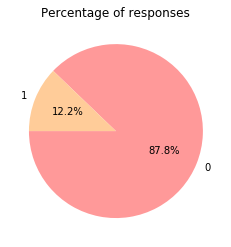

In [0]:
fig = plt.gcf()
draw_pie_chart(df_rs, 'Response', fig, {0: 0, 1: 1}, 'Percentage of responses')

#### The data is unbalanced. Therefore, we have to resampling before building a prediction model.

In [0]:
df_pd=df_new.toPandas()
df_rs_no = df_pd[df_pd.Response == 0]
df_rs_yes = df_pd[df_pd.Response == 1]

#### Gender , Driving_License , Previously_Insured , Vehicle_Age , and Vehicle_Damage

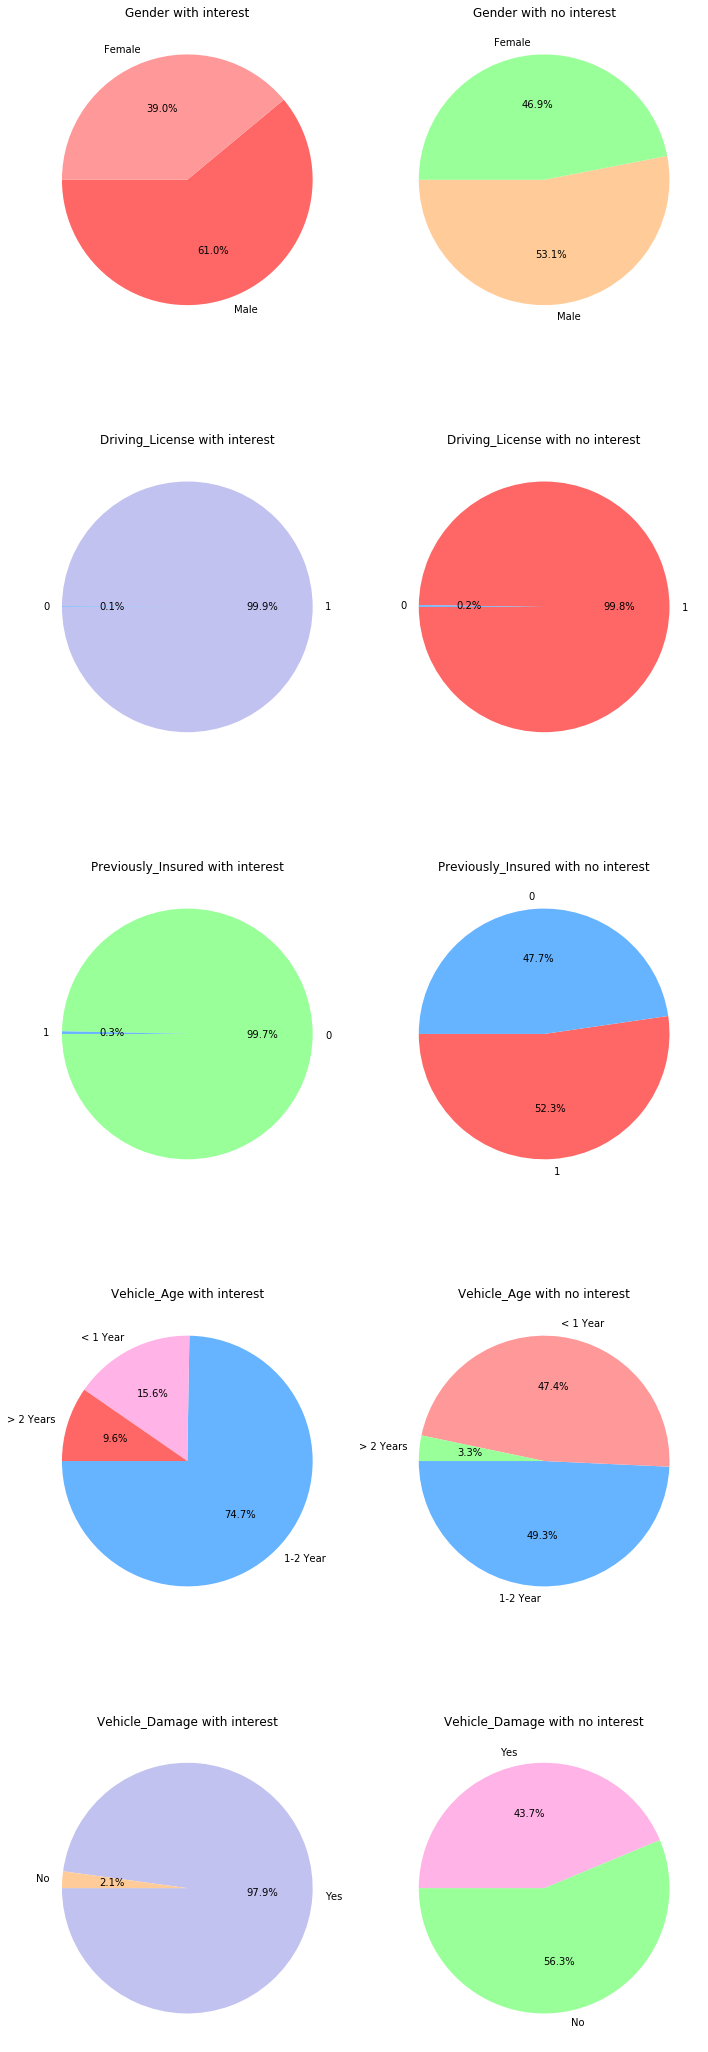

In [0]:
fig = plt.gcf()
fig.set_size_inches(10, 30)
grid_rows = 5
grid_cols = 2

# Draw Gender Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_pie_chart(df_rs_yes, 'Gender', fig, {0: 'Female', 1: 'Male'}, 'Gender with interest')

plt.subplot(grid_rows, grid_cols, 2)
draw_pie_chart(df_rs_no , 'Gender', fig, {0: 'Female', 1: 'Male'}, 'Gender with no interest')

# Draw Driving_License chart
plt.subplot(grid_rows, grid_cols, 3)
draw_pie_chart(df_rs_yes, 'Driving_License', fig, {0:'0', 1:'1'}, 'Driving_License with interest')

plt.subplot(grid_rows, grid_cols, 4)
draw_pie_chart(df_rs_no, 'Driving_License', fig, {0:'0', 1:'1'}, 'Driving_License with no interest')

# Draw Previously_Insured chart
plt.subplot(grid_rows, grid_cols, 5)
draw_pie_chart(df_rs_yes, 'Previously_Insured', fig, {0:'0', 1:'1'}, 'Previously_Insured with interest')

plt.subplot(grid_rows, grid_cols, 6)
draw_pie_chart(df_rs_no , 'Previously_Insured', fig, {0:'0', 1:'1'}, 'Previously_Insured with no interest')

# Draw Vehicle_Age status chart
plt.subplot(grid_rows, grid_cols, 7)
draw_pie_chart(df_rs_yes, 'Vehicle_Age', fig, {0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'}, 'Vehicle_Age with interest')

plt.subplot(grid_rows, grid_cols, 8)
draw_pie_chart(df_rs_no , 'Vehicle_Age', fig, {0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'}, 'Vehicle_Age with no interest')

# Draw Vehicle_Damage type chart
plt.subplot(grid_rows, grid_cols, 9)
draw_pie_chart(df_rs_yes, 'Vehicle_Damage', fig, {0:'Yes', 1:'No'}, 'Vehicle_Damage with interest')

plt.subplot(grid_rows, grid_cols, 10)
draw_pie_chart(df_rs_no , 'Vehicle_Damage', fig, {0:'Yes', 1:'No'}, 'Vehicle_Damage with no interest')


fig.tight_layout()
plt.show()

###  Age , Annual_Premium , and Vintage

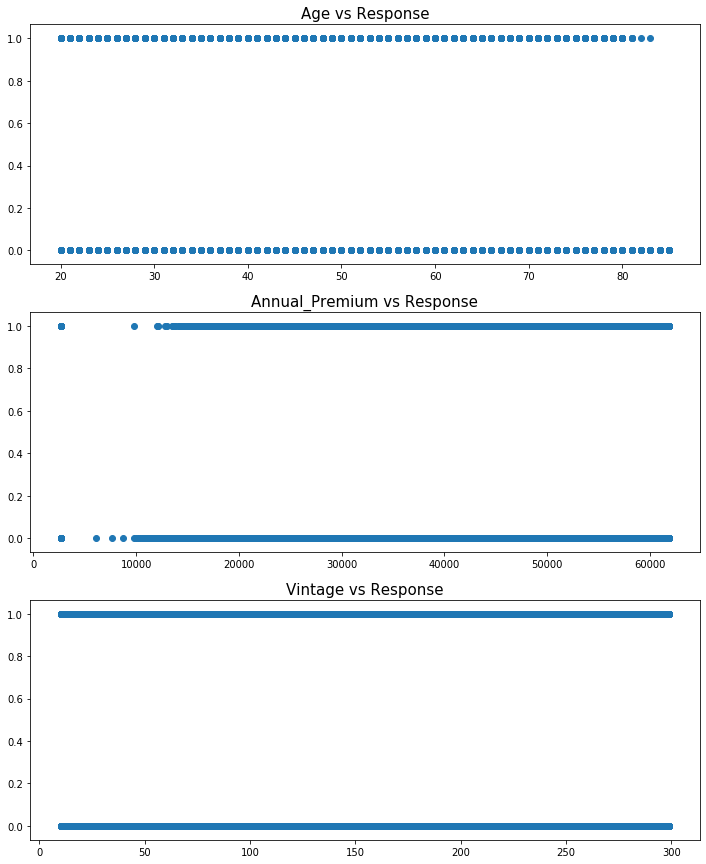

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(3,1, sharey=True,figsize=(12,15)) 
ax1.scatter(df_pd['Age'],df_pd['Response'])
ax1.set_title("Age vs Response", fontsize=15)
ax2.scatter(df_pd['Annual_Premium'],df_pd['Response'])
ax2.set_title("Annual_Premium vs Response", fontsize=15)
ax3.scatter(df_pd['Vintage'],df_pd['Response'])
ax3.set_title("Vintage vs Response", fontsize=15)

In [0]:
#split data to train and test 
train_vi,test_vi = df_new.randomSplit([0.8,0.2],500)

# Resamlping for unbalaneced data

#### Oversampling

In [0]:
#oversampling is implemented 
from pyspark.sql.functions import col, explode, array, lit
major_df = train_vi.filter(col("Response") == 0)
minor_df = train_vi.filter(col("Response") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))
a = range(ratio)
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a ]))).drop('dummy')
train_vi_os = major_df.unionAll(oversampled_df)
train_vi_os.show()

ratio: 7
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0|
10003|Female| 25| 1| 28.0| 0| < 1 Year| Yes| 46728.0| 152.0| 30| 0|
10005| Male| 44| 1| 33.0| 0| 1-2 Year| Yes| 2630.0| 26.0| 221| 0|
10006| Male| 56| 1| 8.0| 0| 1-2 Year| Yes| 46359.0| 26.0| 279| 0|
10007| Male| 56| 1| 8.0| 1| 1-2 Year| No| 32284.0| 124.0| 265| 0|
10008| Male| 39| 1| 28.0| 0| 1-2 Year| Yes| 37999.0| 124.0| 155| 0|
 1001| Male| 49| 1| 18.0| 0| 1-2 Year| Yes| 47406.0| 26.0| 212| 0|
10010|Female| 55| 1| 28.0| 0| 1-2 Year| Yes| 38997.0| 120.0| 18| 0|
10011| Male| 42| 1| 28.0| 1| 1-2 Year| No| 2630.0| 60.0| 128| 0|
10012| Male| 48| 1| 30.0| 0| 1-2 Year| Yes| 36503.0| 124.0| 93| 0|
10013| Male| 40| 1| 28.0| 0| 1-2 Year| No| 37883.0| 124.0| 92| 0|
10016| Male| 28| 1| 36.0| 1| < 1 Year| No| 45872.0| 152.0| 285| 0|
10018| Male| 56| 1| 28.0| 0| 1-2 Year| Yes| 39835.0| 124.0| 98| 0|
10019| Male| 51| 1| 3.0| 1| 1-2 Year| No| 51858.0| 124.0| 161| 0|
 1002|Female| 26| 1| 28.0| 1| < 1 Year| No| 43080.0| 152.0| 76| 0|
10020| Male| 21| 1| 46.0| 1| < 1 Year| No| 21239.0| 160.0| 152| 0|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

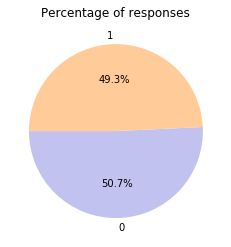

In [0]:
#Now let's check whether the data is balanced then we'll enter model building part.
df_rs1=train_vi_os.select('Response').toPandas()
fig = plt.gcf()
draw_pie_chart(df_rs1, 'Response', fig, {0: 0, 1: 1}, 'Percentage of responses')

### The data is balanced now, next is model budilding for prediction!

# Machine Learning Model Building

### Label encoding

In [0]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                StringIndexer,OneHotEncoder)

In [0]:
VA_indexer = StringIndexer(inputCol='Vehicle_Age',outputCol='Vehicle_AgeIndex')
VD_indexer = StringIndexer(inputCol='Vehicle_Damage',outputCol='Vehicle_DamageIndex')
Gen_indexer = StringIndexer(inputCol='Gender',outputCol='GenderIndex')
DL_indexer = StringIndexer(inputCol='Driving_License',outputCol='Driving_LicenseIndex')
RC_indexer = StringIndexer(inputCol='Region_Code',outputCol='Region_CodeIndex')
PSC_indexer = StringIndexer(inputCol='Policy_Sales_Channel',outputCol='Policy_Sales_ChannelIndex')
PI_indexer = StringIndexer(inputCol='Previously_Insured',outputCol='Previously_InsuredIndex')

In [0]:
train_vi_os.show(5)

+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 5 rows

In [0]:
input_cols_Label= ['GenderIndex', 'Vehicle_AgeIndex', 'Vehicle_DamageIndex', 'Age', 'Driving_LicenseIndex', 'Region_CodeIndex', 'Previously_InsuredIndex','Annual_Premium','Policy_Sales_ChannelIndex','Vintage']
assembler_Label = VectorAssembler(inputCols=input_cols_Label,outputCol='features')

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
#pipeline 
from pyspark.ml import Pipeline

In [0]:
# split data to  train and test
#train_vi,test_vi = df_new1.randomSplit([0.8,0.2],500)

## Feature selection by Random forest classifier

In [0]:
rf_vi = RandomForestClassifier(featuresCol='features',labelCol='Response',maxBins=200)
pipeline_rf_Label = Pipeline(stages=[VA_indexer,VD_indexer,Gen_indexer,RC_indexer,DL_indexer,PSC_indexer,PI_indexer,assembler_Label,rf_vi])

In [0]:
fit_rf_Label = pipeline_rf_Label.fit(train_vi_os)

In [0]:
fit_rf_Label.stages[-1].featureImportances

Out[161]: SparseVector(10, {0: 0.0002, 1: 0.0168, 2: 0.4788, 3: 0.0832, 4: 0.0002, 5: 0.0085, 6: 0.3933, 7: 0.0004, 8: 0.0186, 9: 0.0})

In [0]:
df_new2 = fit_rf_Label.transform(train_vi_os)

In [0]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [0]:
ExtractFeatureImp(fit_rf_Label.stages[-1].featureImportances, df_new2, "features")

,idx,name,vals,score
5,2,Vehicle_DamageIndex,"[Yes, No]",0.478845
8,6,Previously_InsuredIndex,"[0, 1]",0.393274
0,3,Age,NaN,0.083223
9,8,Policy_Sales_ChannelIndex,"[26.0, 152.0, 124.0, 156.0, 160.0, 122.0, 157....",0.018607
4,1,Vehicle_AgeIndex,"[1-2 Year, < 1 Year, > 2 Years]",0.016758
7,5,Region_CodeIndex,"[28.0, 8.0, 46.0, 41.0, 15.0, 29.0, 30.0, 3.0,...",0.008519
1,7,Annual_Premium,NaN,0.000393
6,4,Driving_LicenseIndex,"[1, 0]",0.000191
3,0,GenderIndex,"[Male, Female]",0.000165
2,9,Vintage,NaN,0.000023


In [0]:
features=ExtractFeatureImp(fit_rf_Label.stages[-1].featureImportances, df_new2, "features")
features=features[features.score>0.05].iloc[:,1].tolist()
vars=features+['Response']
vars

Out[165]: ['Vehicle_DamageIndex', 'Previously_InsuredIndex', 'Age', 'Response']

In [0]:
train_vi_os_selected = fit_rf_Label.transform(train_vi_os).select(vars)
test_vi_selected = fit_rf_Label.transform(test_vi).select(vars)
train_vi_selected = fit_rf_Label.transform(train_vi).select(vars)  #  train dataset before oversampling

In [0]:
assembler = VectorAssembler(inputCols= features, outputCol="features")
df_train_os = assembler.transform(train_vi_os_selected)
df_test = assembler.transform(test_vi_selected)
df_train = assembler.transform(train_vi_selected) #  train dataset before oversampling

## Using 3 algorithms to build the model.
### 1. Logistic Regression
### 2. Random Forest Classifier
### 3. Decision Tree Classifier

In [0]:
lr_vi = LogisticRegression(featuresCol='features',labelCol='Response')
rf_vi = RandomForestClassifier(featuresCol='features',labelCol='Response',maxBins=200)
dt_vi = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Response',maxBins=160,maxDepth=30)

In [0]:
fit_lr = lr_vi.fit(df_train_os)
fit_rf = rf_vi.fit(df_train_os)
fit_dt = dt_vi.fit(df_train_os)

In [0]:
test_lr_results = fit_lr.transform(df_test)
test_rf_results = fit_rf.transform(df_test)
test_dt_results = fit_dt.transform(df_test)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [0]:
AUC_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='Response')
Accu_evaluator = MulticlassClassificationEvaluator()
Accu_evaluator.setPredictionCol('prediction')
Accu_evaluator.setLabelCol('Response')

Out[172]: MulticlassClassificationEvaluator_7d09e9ed4f7b

### Accuracy

In [0]:
Accu_test_lr = Accu_evaluator.evaluate(test_lr_results, {Accu_evaluator.metricName: "accuracy"})
Accu_test_rf = Accu_evaluator.evaluate(test_rf_results, {Accu_evaluator.metricName: "accuracy"})
Accu_test_dt = Accu_evaluator.evaluate(test_dt_results, {Accu_evaluator.metricName: "accuracy"})

print("Test Accuracy of Logistic Regression:  ", Accu_test_lr)
print("Test Accuracy of Random Forest Classifier:  ", Accu_test_rf)
print("Test Accuracy of Decision Tree Classifier:  ", Accu_test_dt)

Test Accuracy of Logistic Regression: 0.6406735681271455
Test Accuracy of Random Forest Classifier: 0.6628240127577911
Test Accuracy of Decision Tree Classifier: 0.6833797334919047

### AUC

In [0]:
AUC_test_lr = AUC_eval.evaluate(test_lr_results)
AUC_test_rf = AUC_eval.evaluate(test_rf_results)
AUC_test_dt = AUC_eval.evaluate(test_dt_results)

print("AUC of Logistic Regression: ", AUC_test_lr)
print("AUC of Random Forest Classifier: ", AUC_test_rf)
print("AUC of Decision Tree Classifier: ", AUC_test_dt)

AUC of Logistic Regression: 0.786824639544498
AUC of Random Forest Classifier: 0.7925989879594557
AUC of Decision Tree Classifier: 0.7935931507986598

#Sensitivity

In [0]:
rdd_dt= sc.parallelize(test_dt_results.select('prediction','Response').collect())
rdd_lr= sc.parallelize(test_lr_results.select('prediction','Response').collect())
rdd_rf= sc.parallelize(test_rf_results.select('prediction','Response').collect())

In [0]:
df_dt= sqlContext.createDataFrame(rdd_dt, ["prediction", "Response"])
df_lr= sqlContext.createDataFrame(rdd_lr, ["prediction", "Response"])
df_rf= sqlContext.createDataFrame(rdd_rf, ["prediction", "Response"])

### Check evaluation standards

### Evaluation standard

In [0]:
tp_dt = df_dt[(df_dt.Response == 1) & (df_dt.prediction == 1)].count()
tn_dt = df_dt[(df_dt.Response == 0) & (df_dt.prediction == 0)].count()
fp_dt = df_dt[(df_dt.Response == 0) & (df_dt.prediction == 1)].count()
fn_dt = df_dt[(df_dt.Response == 1) & (df_dt.prediction == 0)].count()


tp_lr = df_lr[(df_lr.Response == 1) & (df_lr.prediction == 1)].count()
tn_lr = df_lr[(df_lr.Response == 0) & (df_lr.prediction == 0)].count()
fp_lr = df_lr[(df_lr.Response == 0) & (df_lr.prediction == 1)].count()
fn_lr = df_lr[(df_lr.Response == 1) & (df_lr.prediction == 0)].count()

tp_rf = df_rf[(df_rf.Response == 1) & (df_rf.prediction == 1)].count()
tn_rf = df_rf[(df_rf.Response == 0) & (df_rf.prediction == 0)].count()
fp_rf = df_rf[(df_rf.Response == 0) & (df_rf.prediction == 1)].count()
fn_rf = df_rf[(df_rf.Response == 1) & (df_rf.prediction == 0)].count()


## Sensitivity

In [0]:
Sensitivity_df =float(tp_dt)/(tp_dt + fn_dt)
print("Sensitivity for  decision tree",Sensitivity_df)

print('\n')

Sensitivity_lr =float(tp_lr)/(tp_lr + fn_lr)
print("Sensitivity for  logistic regression",Sensitivity_lr)

Sensitivity_rf =float(tp_rf)/(tp_rf + fn_rf)
print("Sensitivity for random forest ",Sensitivity_rf)

Sensitivity for decision tree 0.9392829392829393


Sensitivity for logistic regression 0.98001998001998
Sensitivity for random forest 0.9641469641469641

In [0]:
Sensitivity_df =float(tp_dt)/(tp_dt + fn_dt)
print("Sensitivity for  decision tree",Sensitivity_df)

Specificity_df =float(tn_dt)/(tn_dt + fp_dt)
print("Specificity for  decision tree",Specificity_df)


Sensitivity for decision tree 0.9392829392829393
Specificity for decision tree 0.6479033623143803

### The best model is Decision Tree Classifier with 68.93% accuracy and 92.91% sensitivity.

### Checking overfitting. Compare accuray of train (before oversampling) and test dataset

In [0]:
train_dt_results = fit_dt.transform(df_train)
Accu_train_dt = Accu_evaluator.evaluate(train_dt_results, {Accu_evaluator.metricName: "accuracy"})

print("Test Accuracy of Decision Tree Classifier:  ", Accu_test_dt)
print("Train Accuracy of Decision Tree Classifier:  ", Accu_train_dt)

Test Accuracy of Decision Tree Classifier: 0.6833797334919047
Train Accuracy of Decision Tree Classifier: 0.6806752135312253

### AUC-ROC Plot for Decision Tree

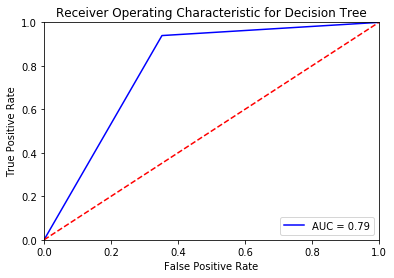

In [0]:
model = fit_dt
predictions = test_dt_results
preds = predictions.select('prediction','Response')\
    .rdd.map(lambda row: (float(row['prediction']), float(row['Response'])))\
    .collect()
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_score, y_true = zip(*preds)
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Both accuray scores are about the same. The model is not overfitting.

# Improving the model with 2 approaches.
### 1. Change Label encoding to one-hot encoding
### 2. Change oversampling to undersampling

## Hyper parameter Tunning for Decision Tree

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
#from mmlspark import ComputeModelStatistics

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="Response", featuresCol="features", maxDepth=2)

# Create ParamGrid for Cross Validation
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dt.maxBins, [10, 20, 40, 80, 100])
             .build())

# Evaluate model
dtevaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Response")

# Create 5-fold CrossValidator
dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = dtevaluator,
                      numFolds = 5)

# Run cross validations
dtcvModel = dtcv.fit(df_train_os)
print(dtcvModel)

# Use test set here so we can measure the accuracy of our model on new data
dtpredictions = dtcvModel.transform(df_test)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)
CrossValidatorModel_d3ba21ad8708

In [0]:
dtcvModel.bestModel

Out[199]: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_56088caa314a, depth=5, numNodes=13, numClasses=2, numFeatures=3

## AUC-ROC curve after tunning

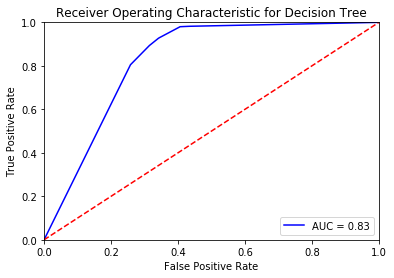

In [0]:
model_tune = dtcvModel
predictions = dtpredictions
preds = predictions.select('probability','Response')\
    .rdd.map(lambda row: (float(row['probability'][1]), float(row['Response'])))\
    .collect()
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_score, y_true = zip(*preds)
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
Accu_test_dt_new = Accu_evaluator.evaluate(dtpredictions, {Accu_evaluator.metricName: "accuracy"})
print('Accuracy after tunning:', Accu_test_dt_new)
print('AUC after tunning',dtevaluator.evaluate(dtpredictions))

Accuracy after tunning: 0.6912992945373949

In [0]:
rdd_dt_new= sc.parallelize(dtpredictions.select('prediction','Response').collect())

In [0]:
df_dt_new= sqlContext.createDataFrame(rdd_dt_new, ["prediction", "Response"])

In [0]:
tp_dt_new = df_dt_new[(df_dt_new.Response == 1) & (df_dt_new.prediction == 1)].count()
tn_dt_new = df_dt_new[(df_dt_new.Response == 0) & (df_dt_new.prediction == 0)].count()
fp_dt_new = df_dt_new[(df_dt_new.Response == 0) & (df_dt_new.prediction == 1)].count()
fn_dt_new = df_dt_new[(df_dt_new.Response == 1) & (df_dt_new.prediction == 0)].count()

In [0]:
Sensitivity_df_new =float(tp_dt_new)/(tp_dt_new + fn_dt_new)
print("Sensitivity for  decision tree",Sensitivity_df_new)

Specificity_df_new =float(tn_dt_new)/(tn_dt_new + fp_dt_new)
print("Specificity for  decision tree",Specificity_df_new)

Sensitivity for decision tree 0.9265179265179265
Specificity for decision tree 0.6586904670308533

### 1. Change Label encoding to one-hot encoding

In [0]:
train_vi_os = train_vi_os.select('Vehicle_Damage', 'Age', 'Previously_Insured','Response')
test_vi =  test_vi.select('Vehicle_Damage', 'Age', 'Previously_Insured','Response')
# based on feature selection

In [0]:
VD_indexer = StringIndexer(inputCol='Vehicle_Damage',outputCol='Vehicle_DamageIndex')
PI_indexer = StringIndexer(inputCol='Previously_Insured',outputCol='Previously_InsuredIndex')

VD_encoder = OneHotEncoder(inputCol='Vehicle_DamageIndex',outputCol='Vehicle_DamageVec')
PI_encoder =OneHotEncoder(inputCol='Previously_InsuredIndex',outputCol='Previously_InsuredVec')

In [0]:
input_cols_hot= ['Vehicle_DamageVec', 'Age', 'Previously_InsuredVec']
assembler_hot = VectorAssembler(inputCols=input_cols_hot,outputCol='features')

In [0]:
dt_vi = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Response')
pipeline_dt_hot = Pipeline(stages=[VD_indexer,PI_indexer,VD_encoder,PI_encoder,assembler_hot,dt_vi])

In [0]:
fit_dt_hot = pipeline_dt_hot.fit(train_vi_os)
test_dt_hot_results = fit_dt_hot.transform(test_vi)
Accu_test_hot = Accu_evaluator.evaluate(test_dt_hot_results, {Accu_evaluator.metricName: "accuracy"})
print("Test Accuracy of Decision Tree Classifier for One-hot encoding:  ", Accu_test_hot)

Test Accuracy of Decision Tree Classifier for One-hot encoding: 0.6892585885342055

### There is no difference between Label encoding and One-hot encoding

### 2.Change oversampling to undersampling

In [0]:
from pyspark.sql.functions import col, explode, array, lit
major_df = train_vi.filter(col("Response") == 0)
minor_df = train_vi.filter(col("Response") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))
sampled_majority_df = major_df.sample(False, 1/ratio)
train_vi_us = sampled_majority_df.unionAll(minor_df)
train_vi_us =  train_vi_us.select('Vehicle_Damage', 'Age', 'Previously_Insured','Response')

ratio: 7

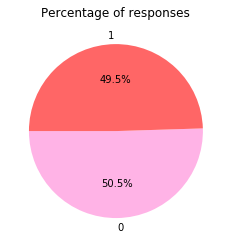

In [0]:
df_rs2=train_vi_us.select('Response').toPandas()
fig = plt.gcf()
draw_pie_chart(df_rs2, 'Response', fig, {0: 0, 1: 1}, 'Percentage of responses')

In [0]:
input_cols_us= ['Vehicle_DamageIndex', 'Age', 'Previously_InsuredIndex']
assembler_us = VectorAssembler(inputCols=input_cols_us,outputCol='features')

In [0]:
dt_vi = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Response')
pipeline_dt_us = Pipeline(stages=[VD_indexer,PI_indexer,assembler_us,dt_vi])

In [0]:
fit_dt_us = pipeline_dt_us.fit(train_vi_os)
test_dt_us_results = fit_dt_us.transform(test_vi)
Accu_test_us = Accu_evaluator.evaluate(test_dt_us_results, {Accu_evaluator.metricName: "accuracy"})
print("Test Accuracy of Decision Tree Classifier for undersampling:  ", Accu_test_us)

Test Accuracy of Decision Tree Classifier for undersampling: 0.6892585885342055

### The accuracy score of undersampling slightly decreases.
### Therefore, we summarize that the best model is built from,
### 1. Using 3 variables, including Vehicle_Damage, Age, Previously_Insured.
### 2. Using Oversampling to solve unbalanced issue.
### 3. Label encoding and One-hot encoding both generate same result.
### 4. Using Decision Tree Classifier algorithm.
### 5. Accuracy score = 68.93% and AUC = 0.79.
### 6. Sensitivity score = 93.91% Specificy =64.79%
### 7. After hyper parameter tunning: Sensitivity score = 92.56 Specificy =65.80%  Auc increased from 79% to 82%, Accuracy changed from 68% to 69%


### Conclusion: After hyperparameter tunning, the gap between sensitivicy and specificity is closer, which means the performence of model increased!